# Ames, Iowa : Predicting Sales Prices - Linear Regression Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler,\
MinMaxScaler, MaxAbsScaler, FunctionTransformer, PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from yellowbrick.regressor import PredictionError, ResidualsPlot
from LR_helper import cat_column_combine_vars, num_new_features,\
label_encode_features, model_results, cat_new_features
from clean_helper import dtype_update
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading cleaned training and testing datasets:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)

### 1. Viewing and checking datasets:-

In [3]:
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1453, 80)

In [5]:
test_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal


In [6]:
test_df.shape

(1457, 79)

In [7]:
# train_df.info()
# test_df.info()

In [8]:
# Changing dtypes for some variables that are actually categorical

# dtype_update(train_df)
# dtype_update(test_df)

In [9]:
# Dropping some features with high multi-collinearity

train_df = train_df.drop(['RoofStyle','Exterior1st','Exterior2nd','GarageType',\
                          'HouseStyle', 'MSSubClass','MSZoning','MasVnrType'], axis=1)

test_df = test_df.drop(['RoofStyle','Exterior1st','Exterior2nd','GarageType',\
                          'HouseStyle', 'MSSubClass','MSZoning','MasVnrType'], axis=1)

## Numerical variable work:

- New Feature: sold_age = Age of the house when it was sold
- New Feature: Usable_space = BsmtFinSF + GrLivArea + 1stFlrSF + 2ndFlrSF
- New Feature: yr_since_remod = Years since remodeling was done
- Total_Halfbaths = sum of all half baths
- Total_Fullbaths = sum of all full baths
- Total porch area = sum of all enclosed porch areas
- BsmtFinSF = sum of Type 1 and Type 2 finished basement area

In [10]:
num_new_features(train_df)
num_new_features(test_df)
print(train_df.shape)
print(test_df.shape)

(1453, 79)
(1457, 78)


## Checking correlations for all features with SalePrice :-

<AxesSubplot:>

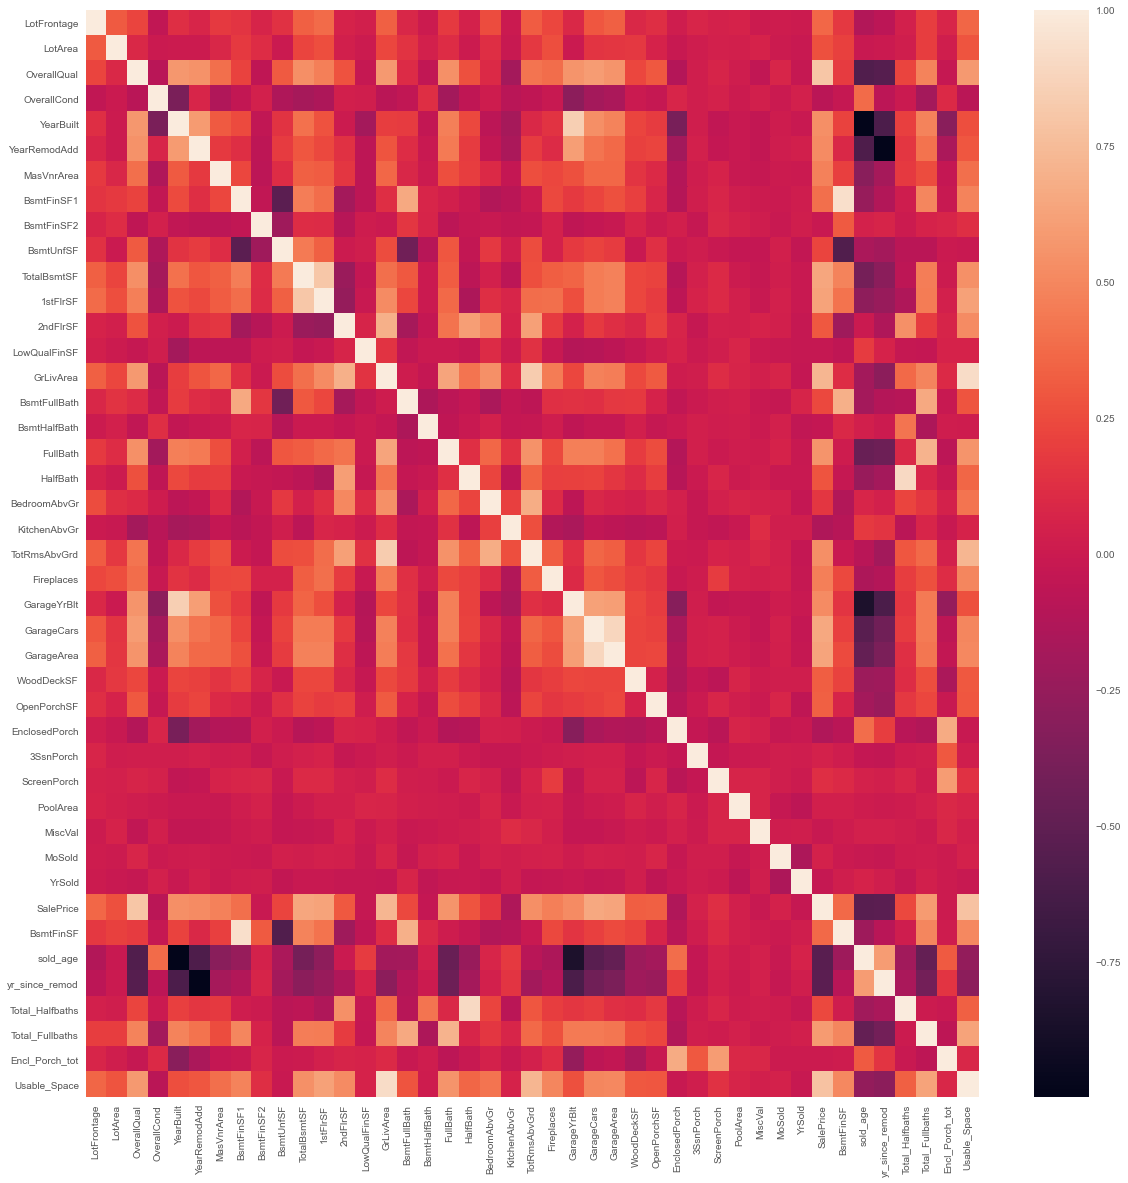

In [11]:
# Checking correlations for all features with SalePrice

plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())

## Checking distributions/histograms of some numerical features:

<Figure size 720x720 with 0 Axes>

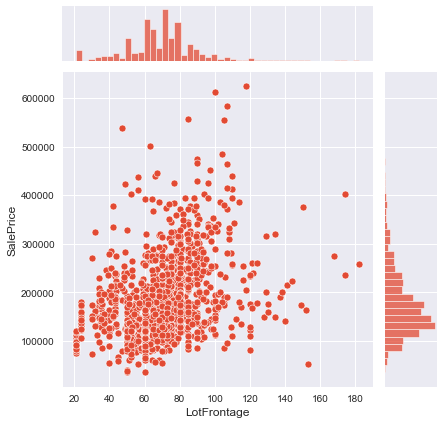

<Figure size 720x720 with 0 Axes>

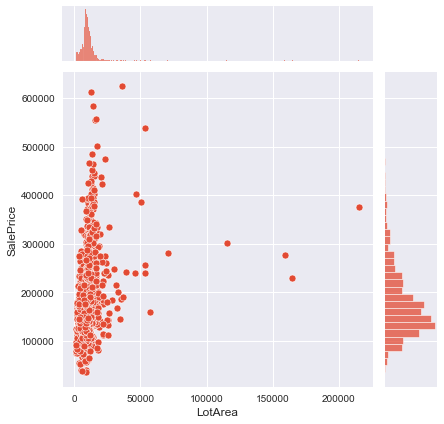

<Figure size 720x720 with 0 Axes>

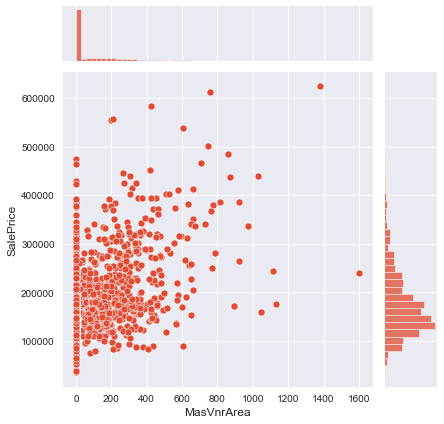

<Figure size 720x720 with 0 Axes>

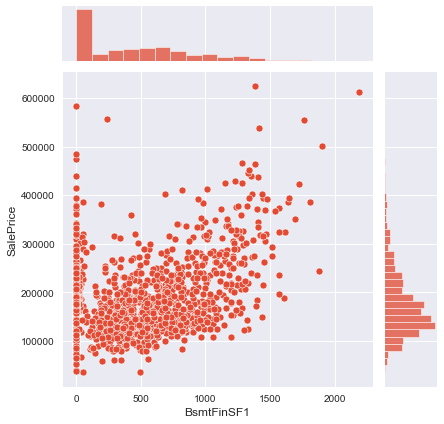

<Figure size 720x720 with 0 Axes>

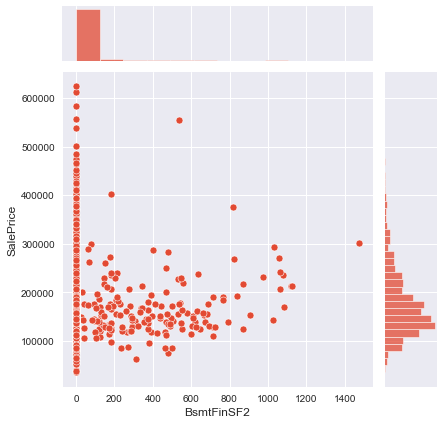

<Figure size 720x720 with 0 Axes>

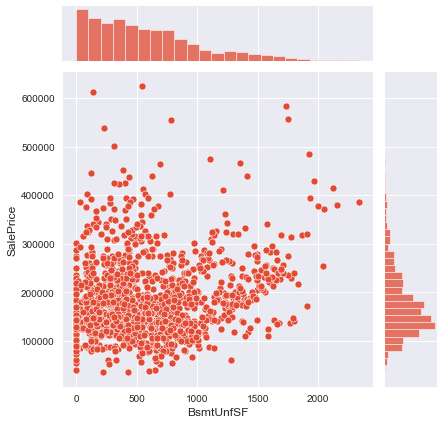

<Figure size 720x720 with 0 Axes>

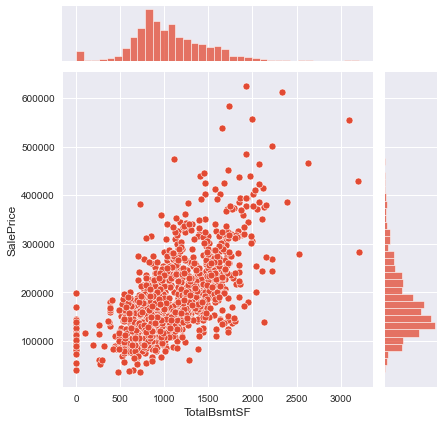

<Figure size 720x720 with 0 Axes>

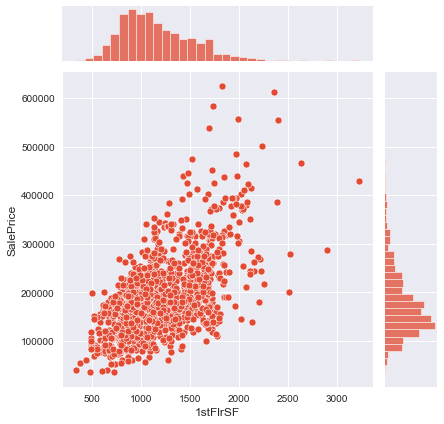

<Figure size 720x720 with 0 Axes>

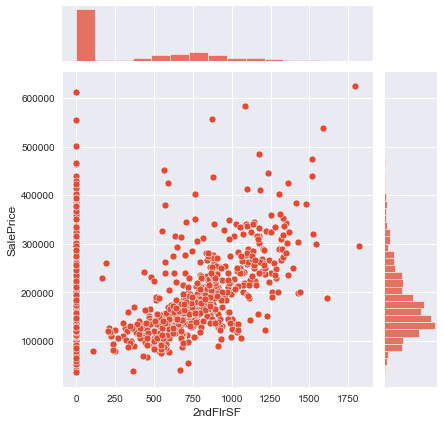

<Figure size 720x720 with 0 Axes>

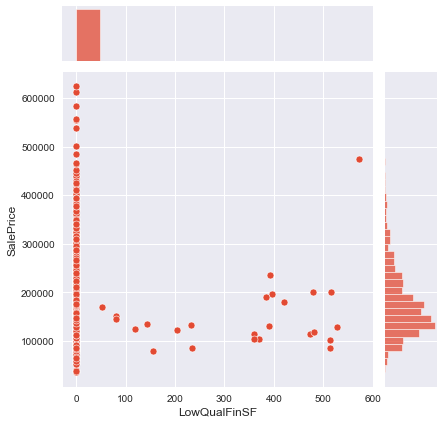

<Figure size 720x720 with 0 Axes>

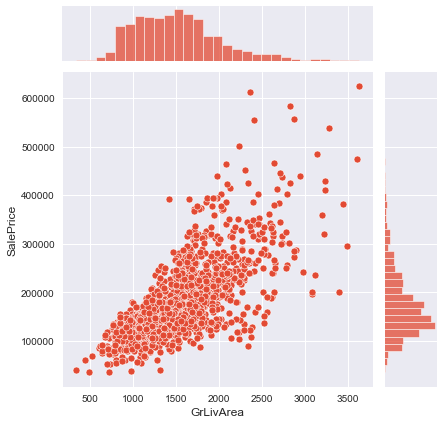

<Figure size 720x720 with 0 Axes>

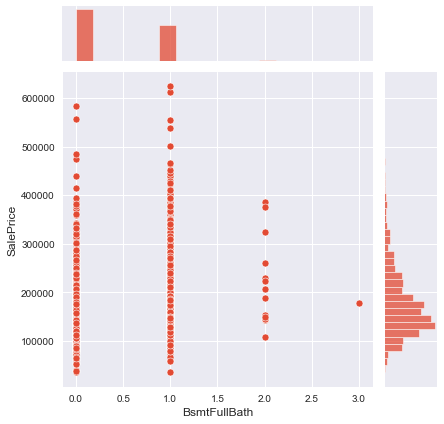

<Figure size 720x720 with 0 Axes>

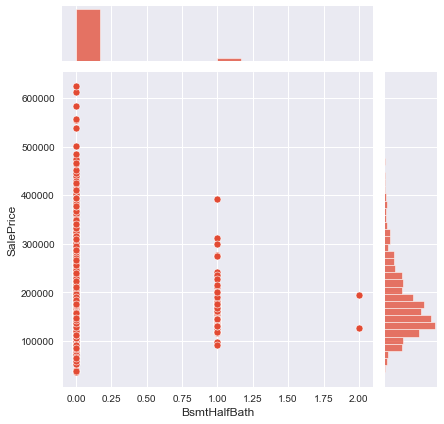

<Figure size 720x720 with 0 Axes>

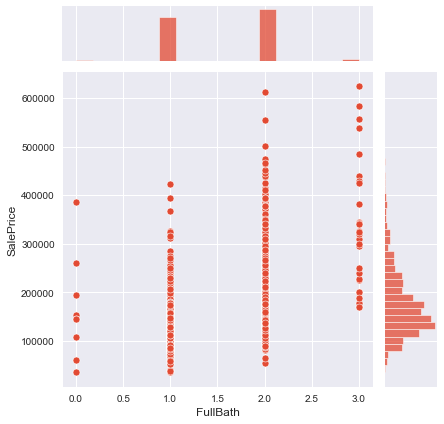

<Figure size 720x720 with 0 Axes>

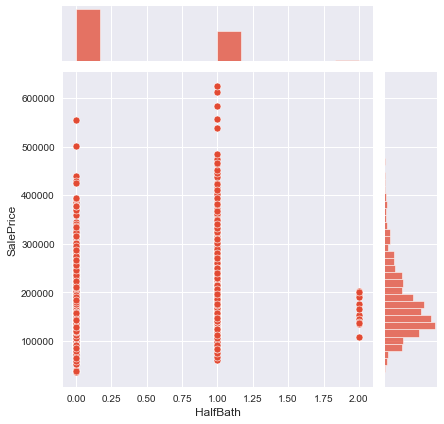

<Figure size 720x720 with 0 Axes>

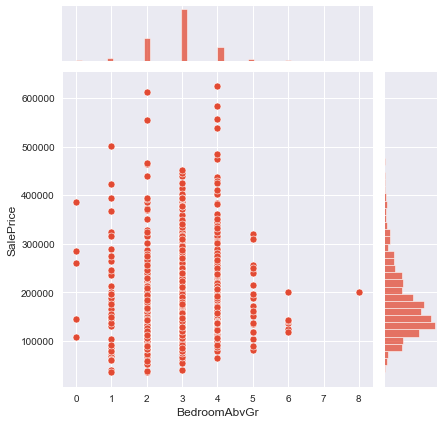

<Figure size 720x720 with 0 Axes>

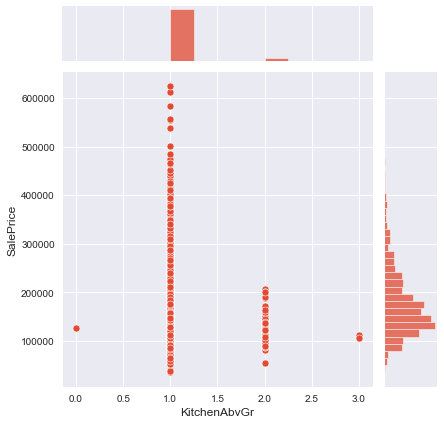

<Figure size 720x720 with 0 Axes>

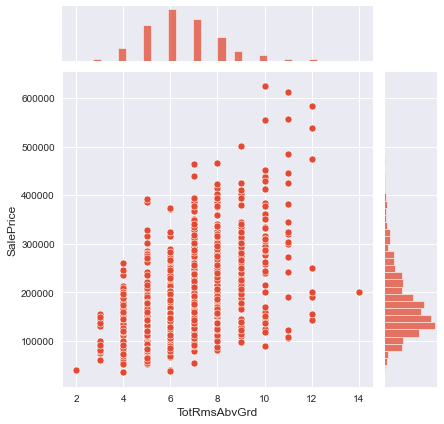

<Figure size 720x720 with 0 Axes>

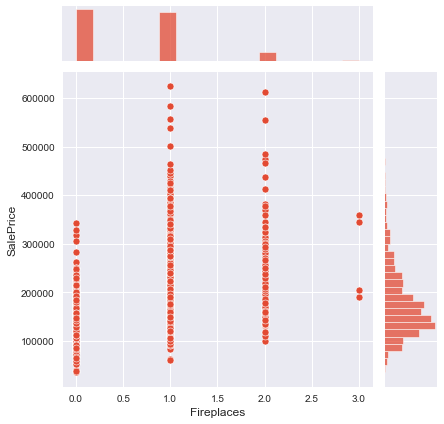

<Figure size 720x720 with 0 Axes>

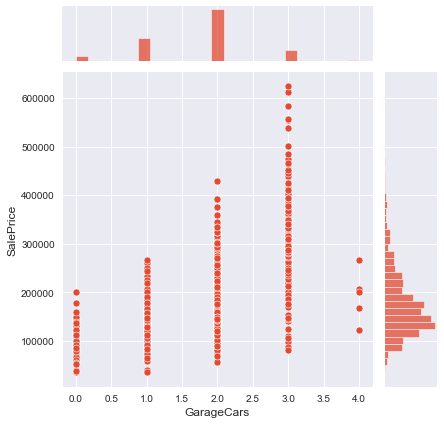

<Figure size 720x720 with 0 Axes>

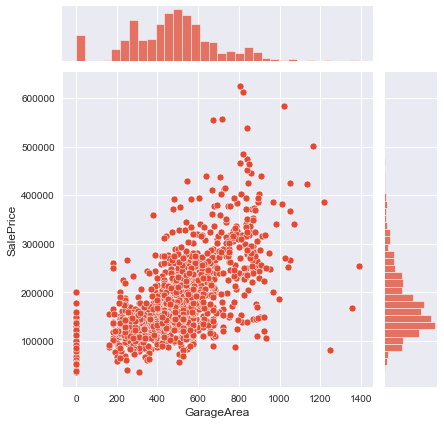

<Figure size 720x720 with 0 Axes>

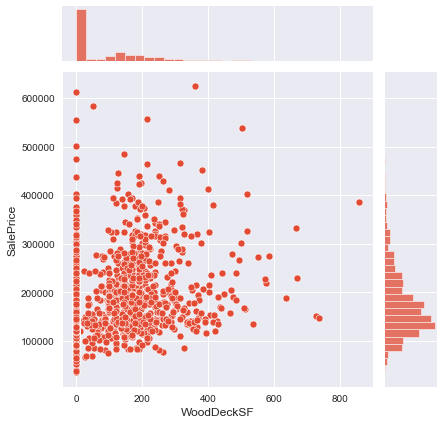

<Figure size 720x720 with 0 Axes>

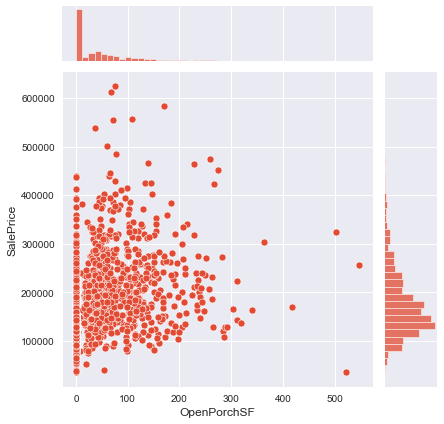

<Figure size 720x720 with 0 Axes>

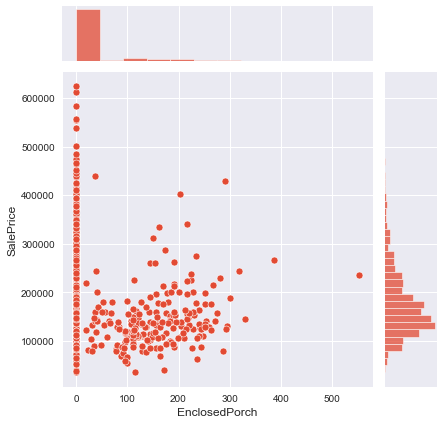

<Figure size 720x720 with 0 Axes>

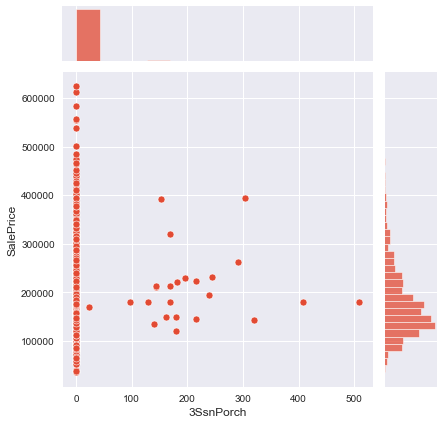

<Figure size 720x720 with 0 Axes>

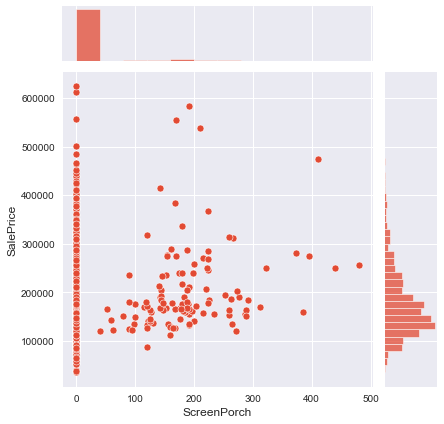

<Figure size 720x720 with 0 Axes>

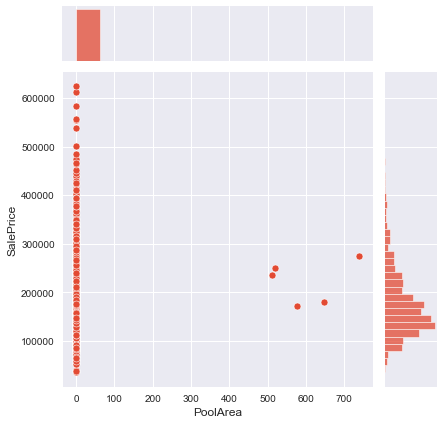

<Figure size 720x720 with 0 Axes>

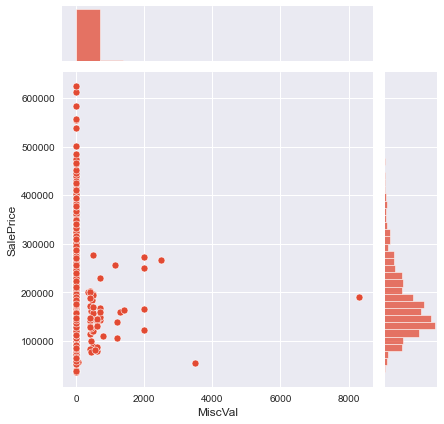

<Figure size 720x720 with 0 Axes>

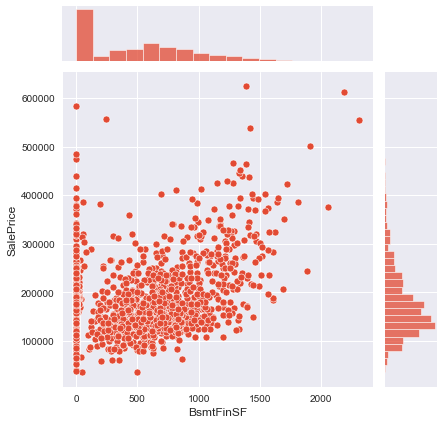

<Figure size 720x720 with 0 Axes>

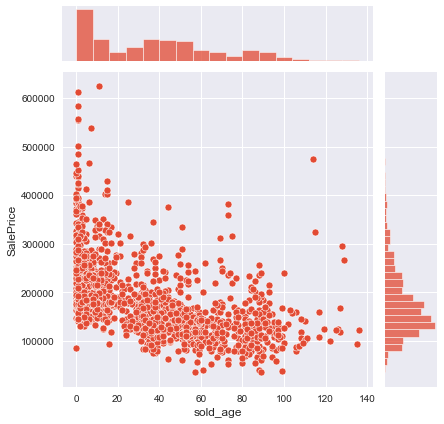

<Figure size 720x720 with 0 Axes>

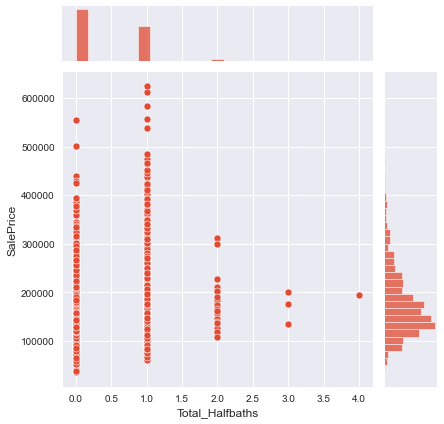

<Figure size 720x720 with 0 Axes>

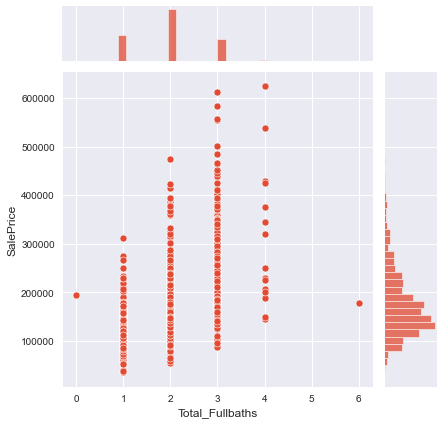

<Figure size 720x720 with 0 Axes>

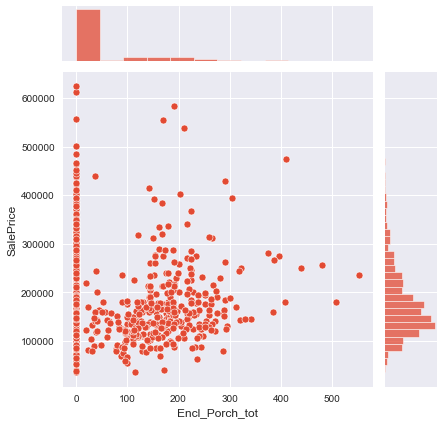

<Figure size 720x720 with 0 Axes>

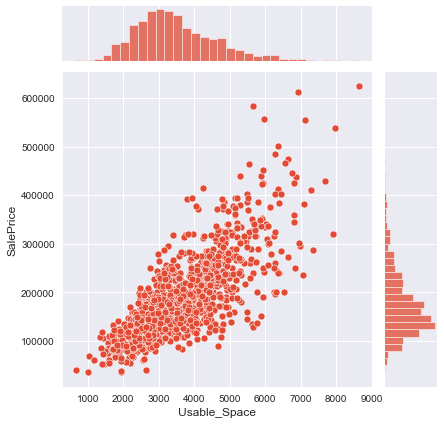

<Figure size 720x720 with 0 Axes>

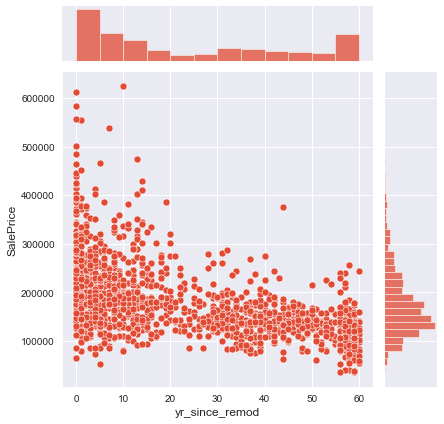

In [12]:
#Adding newly created numerical features as well

col_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
            'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
            'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
            'ScreenPorch', 'PoolArea','MiscVal','BsmtFinSF','sold_age', 'Total_Halfbaths',\
            'Total_Fullbaths', 'Encl_Porch_tot', 'Usable_Space', 'yr_since_remod']

y = train_df['SalePrice']

for col in col_list:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 10))
    x = train_df[col]
    sns.jointplot(x=x, y=y, data=train_df)

## Categorical variable work:

- Use one of Condition column, same as exterior below

In [13]:
# train_df['Exterior1st'].value_counts()
# train_df['Exterior2nd'].value_counts()

### 1. Combining variables to one string value in some categorical columns:-

- For LandContour column replacing values other than lvl to notlvl.
- For Heating column replacing values other than GasA to Heat_othr.
- For Electrical column replacing values other than SBrkr to Electr_othr. 
- For PavedDrive column replacing values other than Y to NP

In [14]:
cat_column_combine_vars(train_df)
cat_column_combine_vars(test_df)
print(train_df.shape)
print(test_df.shape)

(1453, 79)
(1457, 78)


### 2. Creating new categorical variable:-

- Creating column remod_y_n which telss us whether the house was remodeled or not

In [15]:
cat_new_features(train_df)
cat_new_features(test_df)
print(train_df.shape)
print(test_df.shape)

(1453, 80)
(1457, 79)


### 3. Ordinal categories for Label-Encoding:

- LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, 
- BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, 
- GarageCond, PoolQC

In [16]:
train_df[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2',\
        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'PoolQC']]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,No Fireplace,TA,TA,No Pool
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,TA,No Pool
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,TA,No Pool
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,TA,TA,No Pool
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA,TA,No Pool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,TA,TA,TA,No Pool
1456,Reg,Gtl,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA,TA,No Pool
1457,Reg,Gtl,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Gd,TA,TA,No Pool
1458,Reg,Gtl,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,No Fireplace,TA,TA,No Pool


In [17]:
#Label encoding via helper functions:-

label_encode_features(train_df)
label_encode_features(test_df)

print(train_df.shape)
print(test_df.shape)

(1453, 80)
(1457, 79)


In [18]:
train_df[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2',\
        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'PoolQC']]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,0,2,4,2,4,3,2,6,0,2,3,5,5,3
1,3,0,3,4,2,4,1,0,6,0,3,5,5,5,3
2,0,0,2,4,2,4,2,2,6,0,2,5,5,5,3
3,0,0,3,4,4,1,3,0,6,2,2,2,5,5,3
4,0,0,2,4,2,4,0,2,6,0,2,5,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,3,4,2,4,3,6,6,0,3,5,5,5,3
1456,3,0,3,4,2,4,3,0,5,4,3,5,5,5,3
1457,3,0,0,2,4,1,3,2,6,0,2,2,5,5,3
1458,3,0,3,4,4,4,2,2,5,2,2,3,5,5,3


### 4. Nominal categories for One-Hot-Encoding:

- MSSubClass, MSZoning, Street, Alley, LandContour, Utilities, LotConfig,
- Neighborhood, Condition1, Condition2, BldgType, HouseStyle, YearBuilt, YearRemodAdd, RoofStyle, 
- RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, CentralAir,Heating, Electrical, 
- Functional, GarageType, GarageFinish, PavedDrive, Fence, MiscFeature, MoSold, YrSold,
- SaleType, SaleCondition

In [19]:
train_df[['Street', 'Alley', 'LandContour',\
        'Utilities', 'LotConfig','Neighborhood', 'Condition1', 'Condition2',\
        'BldgType', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Foundation',\
        'CentralAir','Heating', 'Electrical', 'Functional',\
        'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',\
        'SaleType', 'SaleCondition','remod_y_n']]

,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,YearBuilt,...,Functional,GarageFinish,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,remod_y_n
0,Pave,No alley access,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2003,...,Typ,RFn,Y,No Fence,None,2,2008,WD,Normal,N
1,Pave,No alley access,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1976,...,Typ,RFn,Y,No Fence,None,5,2007,WD,Normal,N
2,Pave,No alley access,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2001,...,Typ,RFn,Y,No Fence,None,9,2008,WD,Normal,Y
3,Pave,No alley access,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,1915,...,Typ,Unf,Y,No Fence,None,2,2006,WD,Abnorml,Y
4,Pave,No alley access,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2000,...,Typ,RFn,Y,No Fence,None,12,2008,WD,Normal,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,No alley access,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,1999,...,Typ,RFn,Y,No Fence,None,8,2007,WD,Normal,Y
1456,Pave,No alley access,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1978,...,Min1,Unf,Y,MnPrv,None,2,2010,WD,Normal,Y
1457,Pave,No alley access,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,1941,...,Typ,RFn,Y,GdPrv,Shed,5,2010,WD,Normal,Y
1458,Pave,No alley access,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1950,...,Typ,Unf,Y,No Fence,None,4,2010,WD,Normal,Y


In [20]:
print(train_df.shape)
print(test_df.shape)

(1453, 80)
(1457, 79)


In [21]:
col_list = ['Street', 'Alley', 'LandContour',\
        'Utilities', 'LotConfig','Neighborhood', 'Condition1', 'Condition2',\
        'BldgType', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Foundation',\
        'CentralAir','Heating', 'Electrical', 'Functional',\
        'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',\
        'SaleType', 'SaleCondition','remod_y_n']

train_df = pd.get_dummies(data=train_df, columns=col_list, drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=col_list, drop_first=True)

In [22]:
print(train_df.shape)
print(test_df.shape)

(1453, 337)
(1457, 323)


## Dataset density graphs for numerical variables:

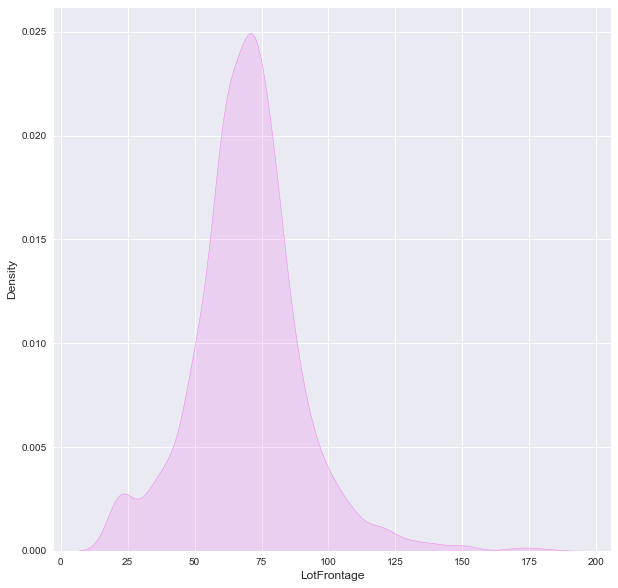

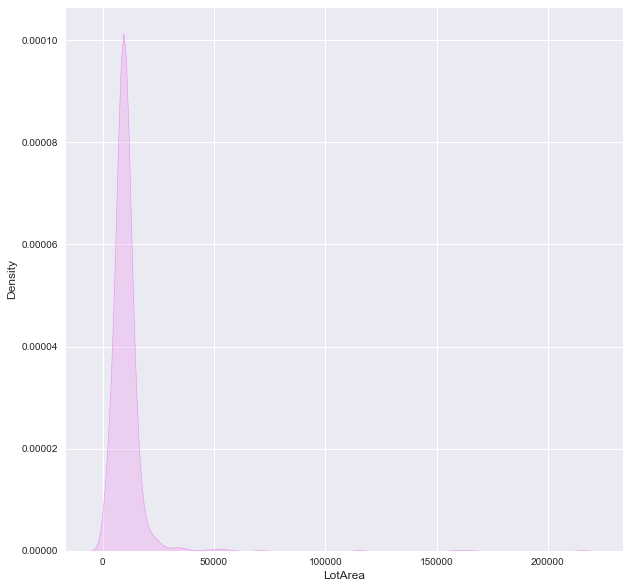

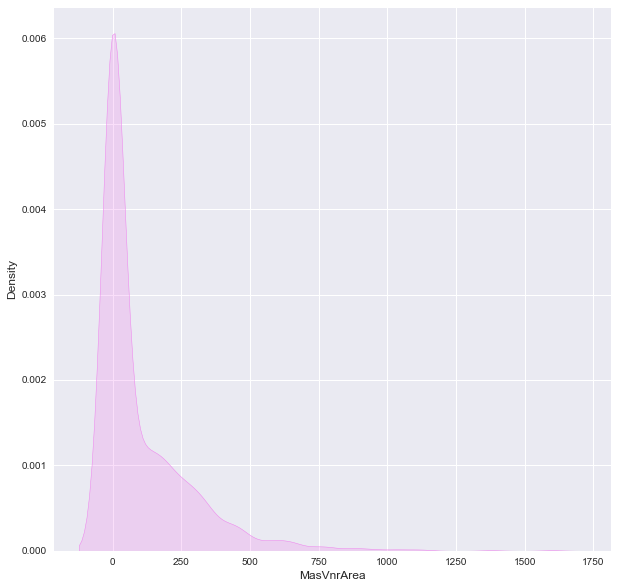

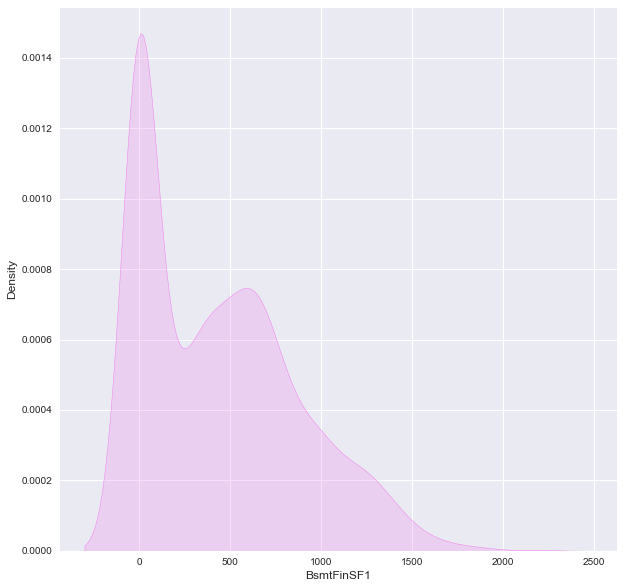

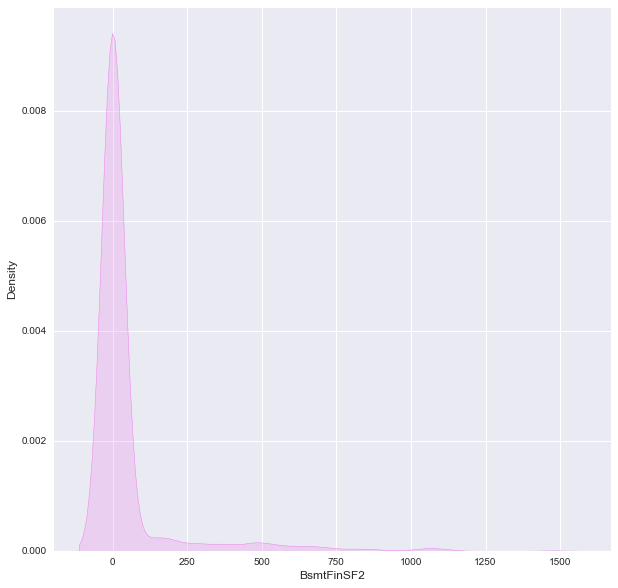

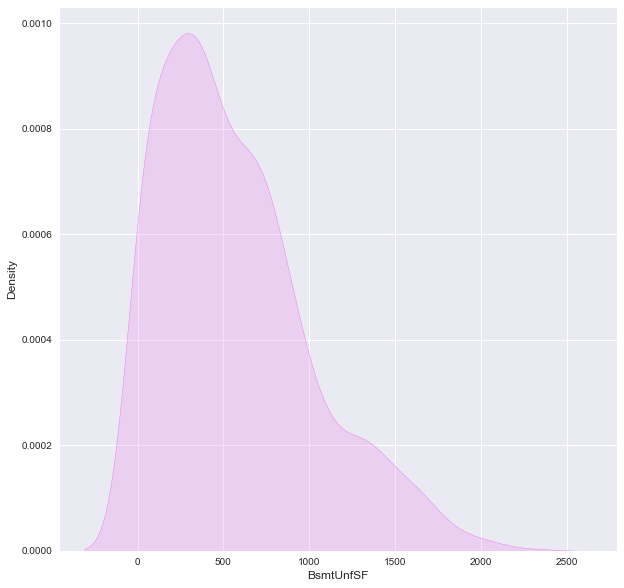

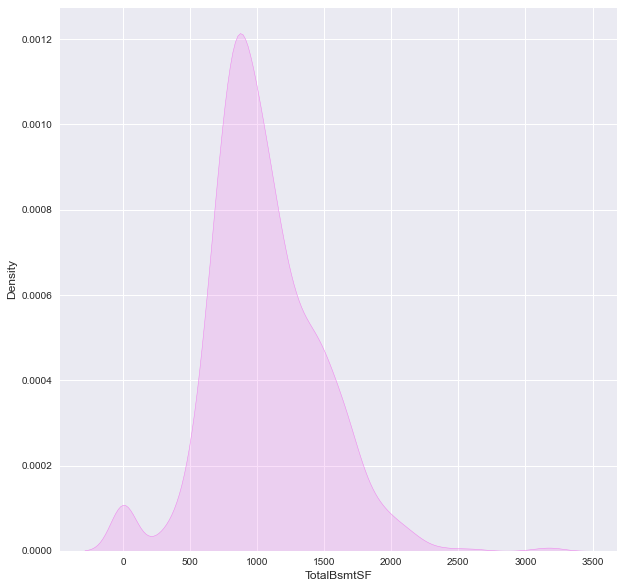

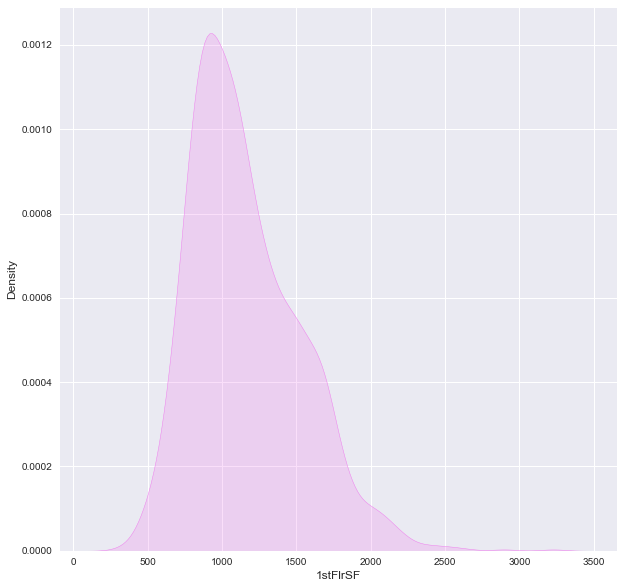

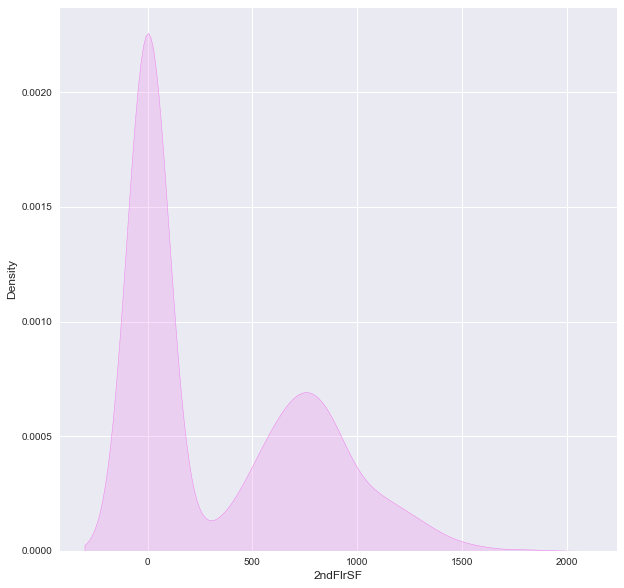

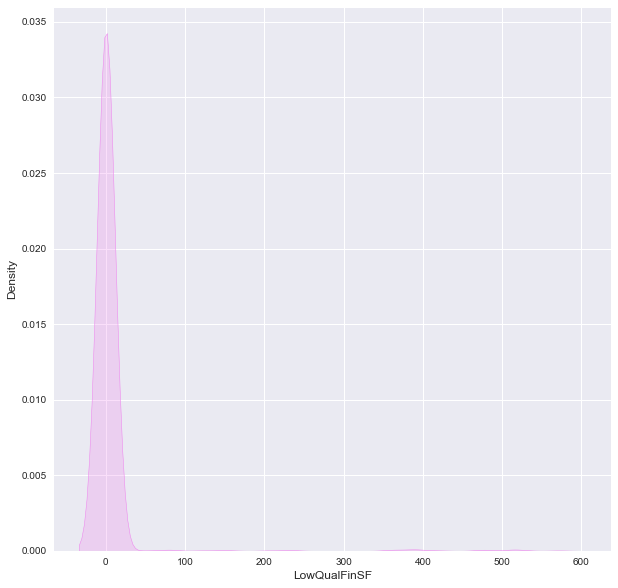

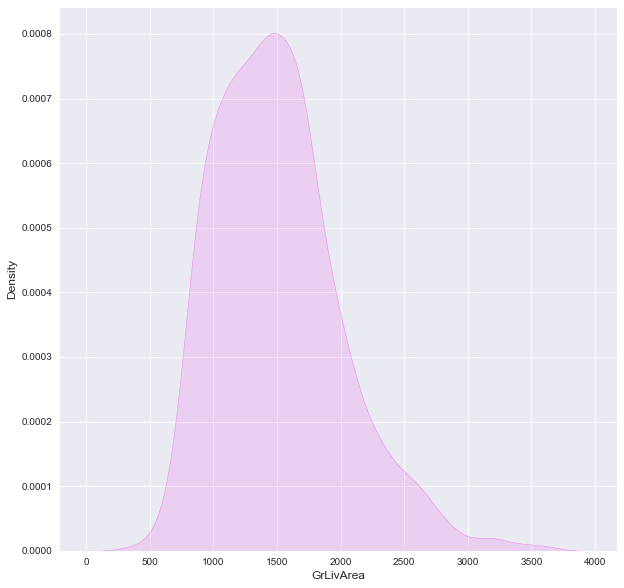

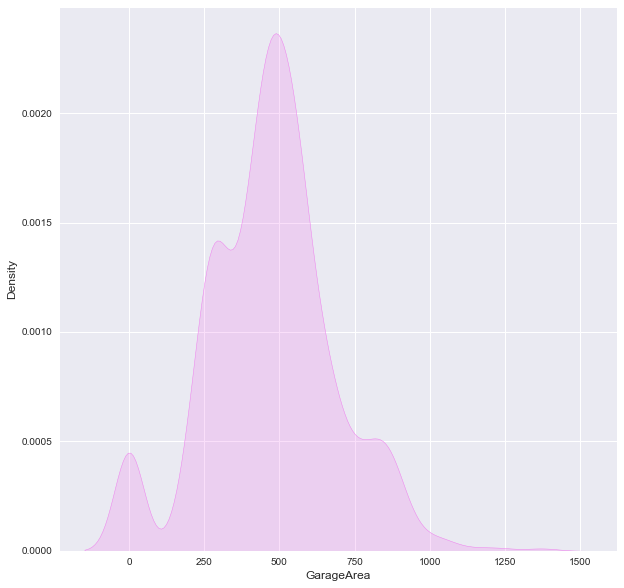

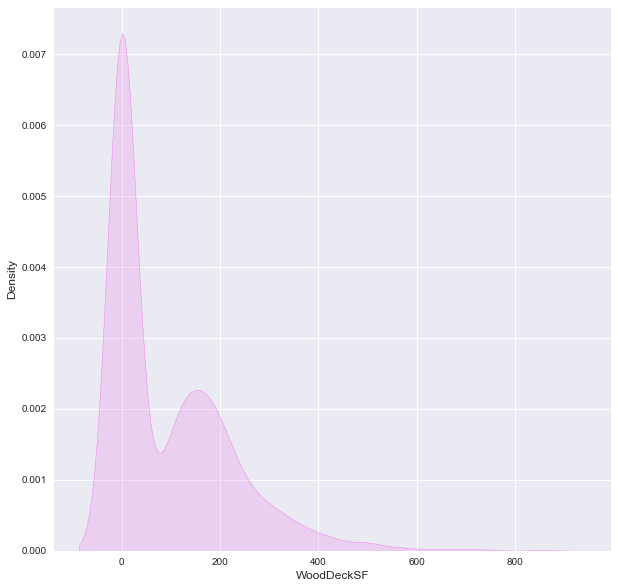

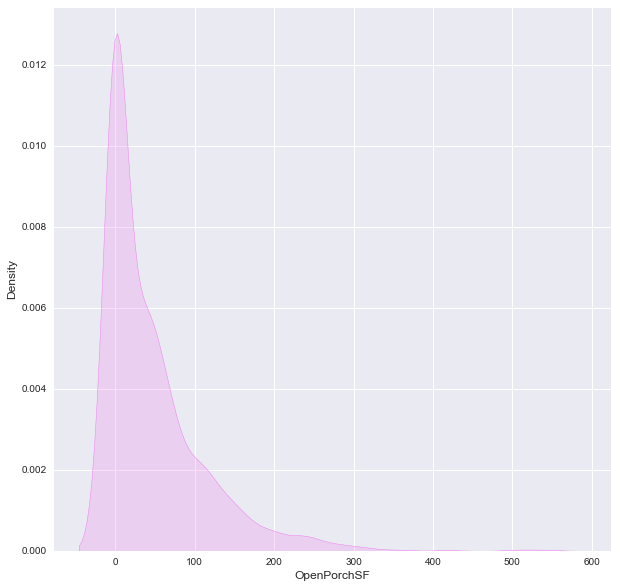

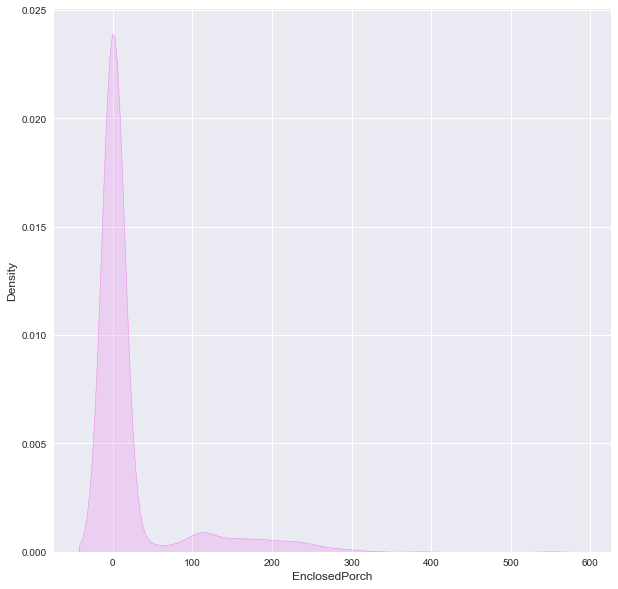

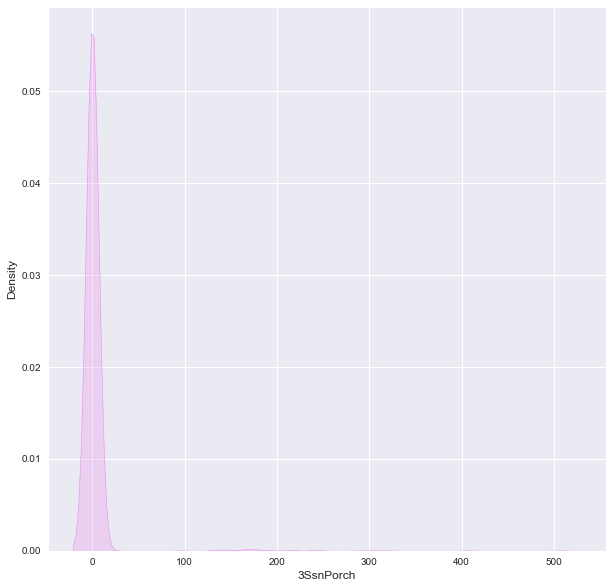

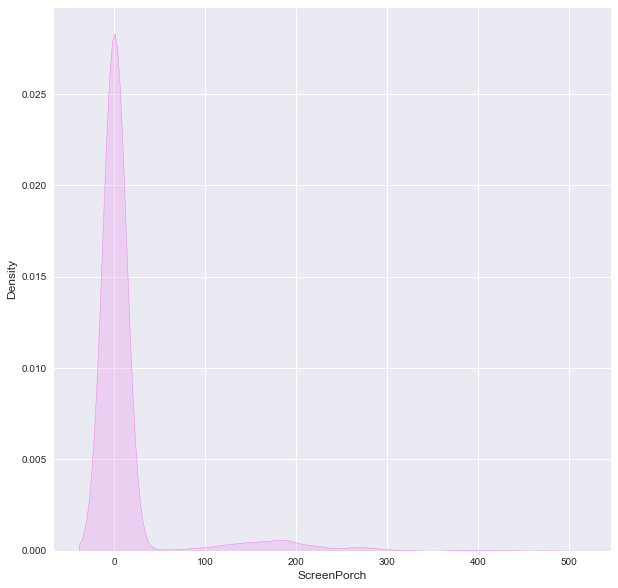

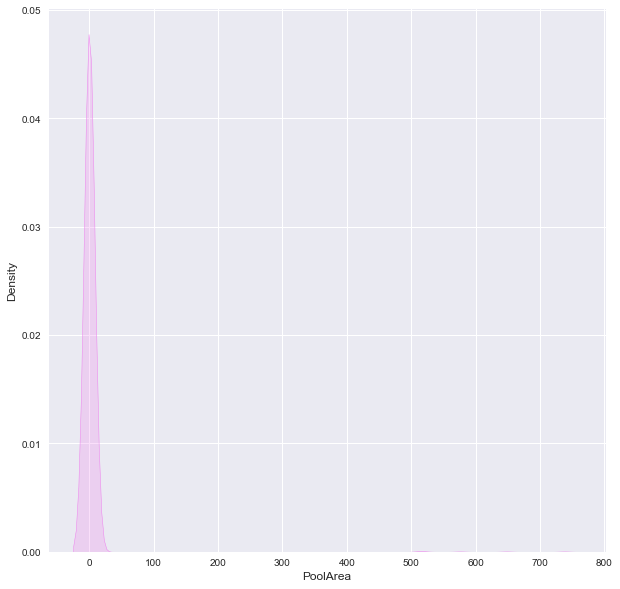

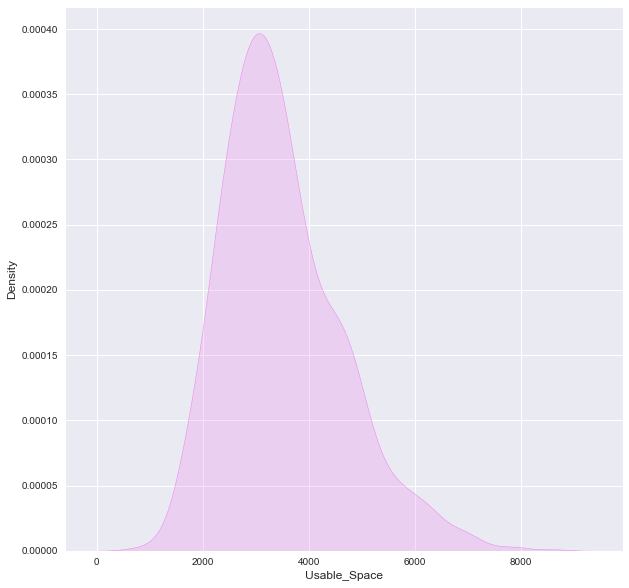

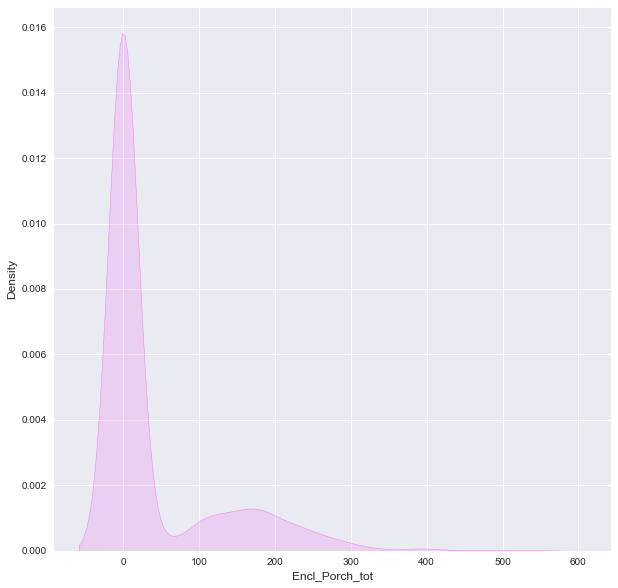

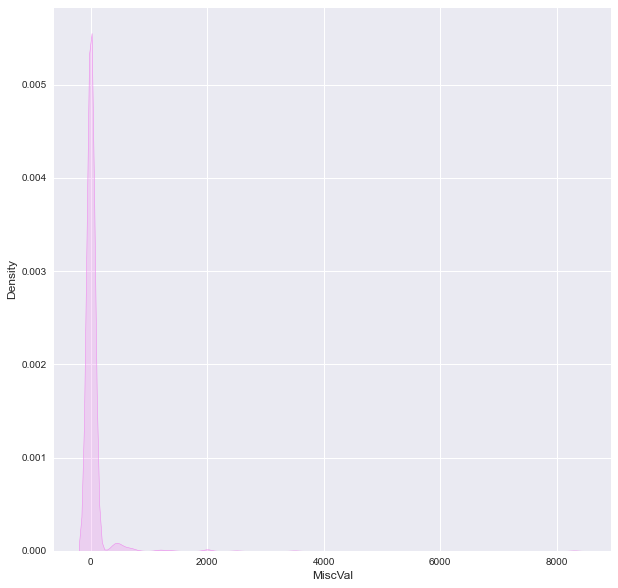

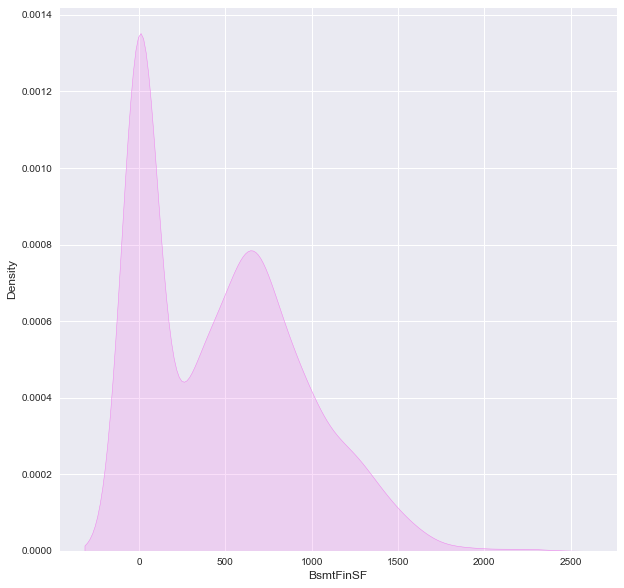

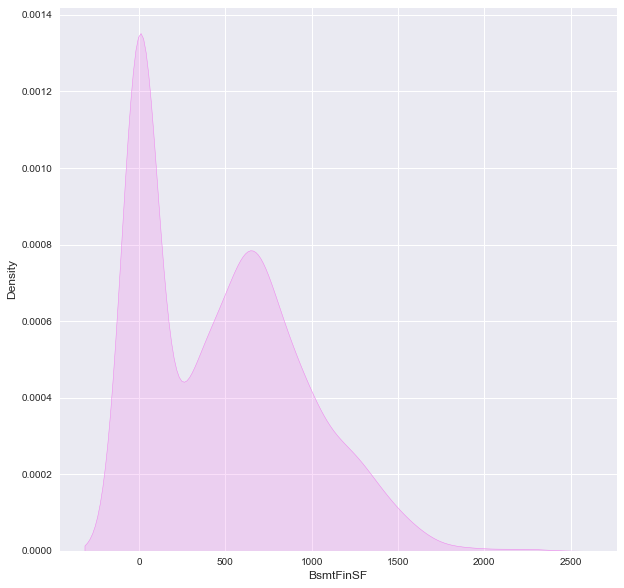

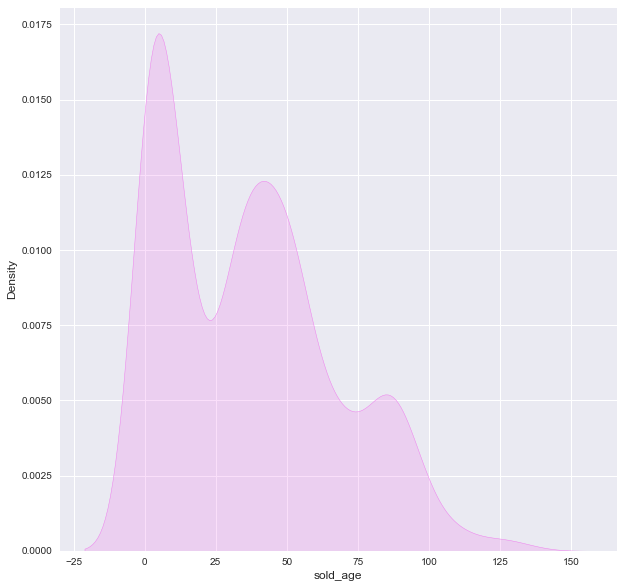

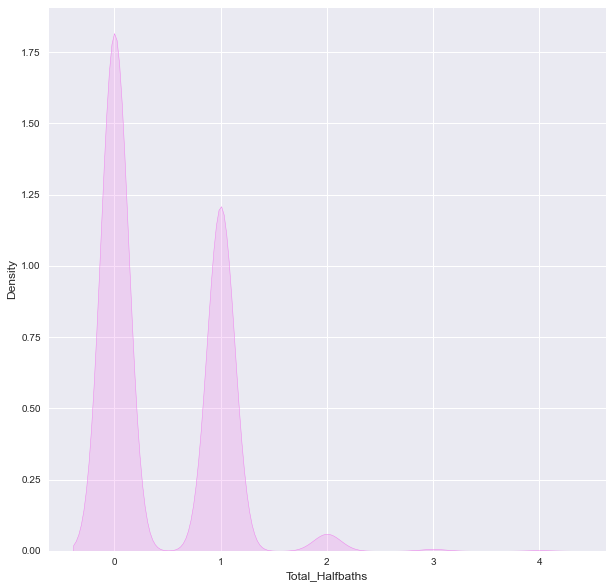

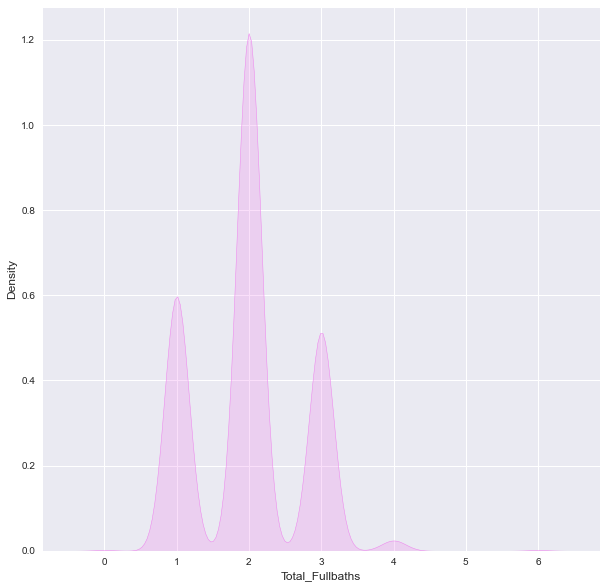

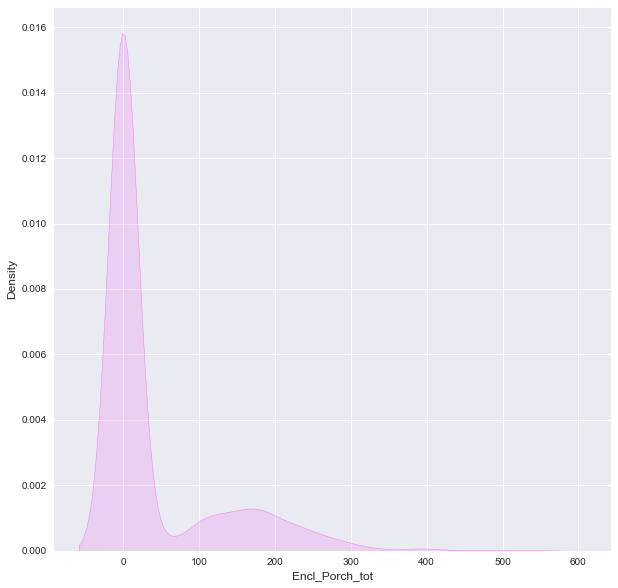

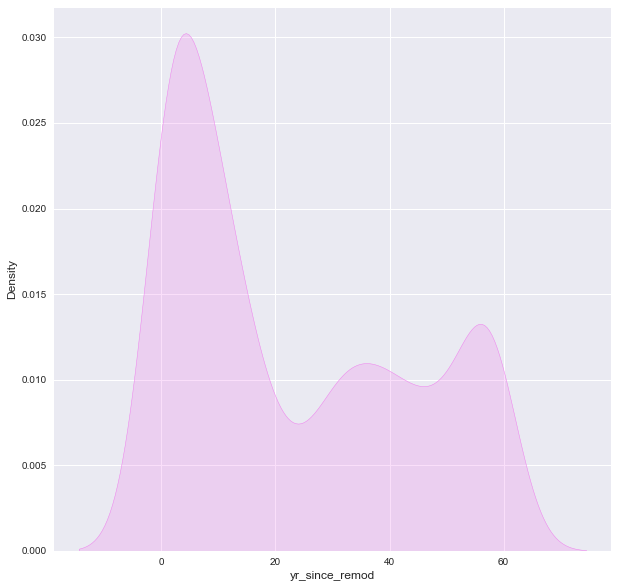

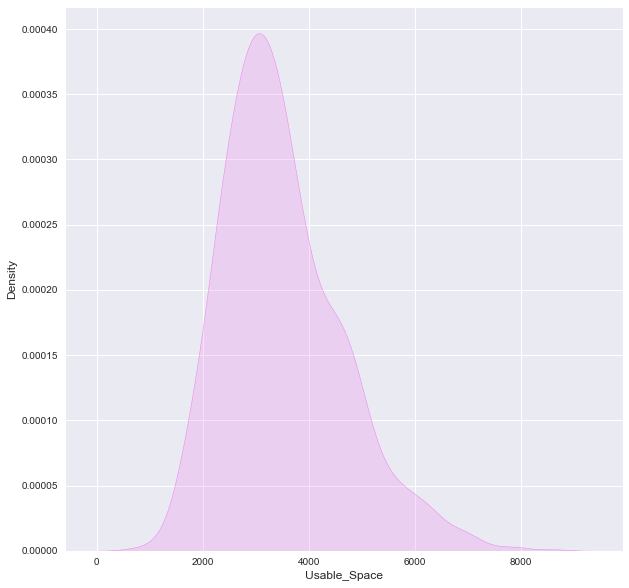

In [23]:
# removing some features such as FullBath, HalfBaths, GarageCars, etc

col_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
            'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
            'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch',\
            'ScreenPorch', 'PoolArea', 'Usable_Space', 'Encl_Porch_tot','MiscVal','BsmtFinSF',\
            'BsmtFinSF','sold_age', 'Total_Halfbaths','Total_Fullbaths', 'Encl_Porch_tot','yr_since_remod','Usable_Space']

for col in col_list:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 10))
    x = train_df[col]
    sns.kdeplot(x, shade=True, color="violet")

## Multicollinearity check for all variables

In [24]:
# Importing packages needed

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Separating independant variables
X = train_df.drop(['SalePrice'], axis=1)

# Creating dataframe to list VIF values for each column
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

#Computing VIF values
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [26]:
#Imputing and removing inf values
vif_data.replace([np.inf, -np.inf], np.nan, inplace=True)
vif_data.dropna(inplace=True)

In [27]:
# vif_data.sort_values(by=['VIF'], ascending=False).head(50)

## Creating Multiple Linear Regression Models

### 1. Base MLR Model:

In [28]:
# Dropping some features from which new features were created

train_df = train_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtHalfBath','HalfBath',\
                          'BsmtFullBath', 'FullBath','EnclosedPorch','3SsnPorch',\
                          'ScreenPorch'], axis=1)

In [29]:
## Seperating x and y variables for test train split

house_x = train_df.drop(['SalePrice'], axis=1)
house_y = train_df['SalePrice']

In [30]:
# Train test 70:30 split

trainX, testX, trainY, testY = train_test_split(house_x, house_y, random_state=42, test_size=0.4)

In [31]:
# Base model:

# mlr_base = LinearRegression()
# model_results(trainX, trainY, testX, testY, mlr_base, show = True)

In [32]:
# residuals = trainY - mlr_base.predict(trainX)
# plt.hist(residuals)

### 2. Base MLR model with y variable log-transformed:

- Before scaling:-

In [33]:
# mlr_ylog = LinearRegression()
# model_results(trainX, np.log(trainY), testX, np.log(testY), mlr_ylog, show = True)

In [34]:
# residuals1 = np.log(trainY) - mlr_ylog.predict(trainX)
# plt.hist(residuals1)

- After standard scaling:-

In [35]:
# scaler_trainX = StandardScaler()
# scaler_testX = StandardScaler()

# scaler_trainX.fit(trainX)
# scaler_testX.fit(testX)

# trainX_scl = scaler_trainX.transform(trainX)
# testX_scl = scaler_testX.transform(testX)

# mlr_ylog_scl = LinearRegression()
# model_results(trainX_scl, np.log(trainY), testX_scl, np.log(testY), mlr_ylog_scl, show = True)

In [36]:
# residuals2 = np.log(trainY) - mlr_ylog_scl.predict(trainX_scl)
# plt.hist(residuals2)

### 3. MLR model with y variable log-transformed and features log transformed only:

In [37]:
trfm = FunctionTransformer(func=np.log1p)
trainX_trans = trfm.fit_transform(trainX)
testX_trans = trfm.fit_transform(testX)

mlr_ylog_tr = LinearRegression()
model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), mlr_ylog_tr, show = True)

Train R^2 is equal to 0.964
Test R^2 is equal to 0.858
The intercept is 6.674
RSS is equal to 4.749
RMSE is equal to 0.074
The training error is: 0.03563
The test     error is: 0.14223


[0.03563307255058856, 0.14222827673671745]

(array([  2.,   1.,   5.,  30., 115., 294., 300.,  94.,  27.,   3.]),
 array([-0.39568338, -0.32934254, -0.2630017 , -0.19666086, -0.13032002,
        -0.06397917,  0.00236167,  0.06870251,  0.13504335,  0.20138419,
         0.26772503]),
 <BarContainer object of 10 artists>)

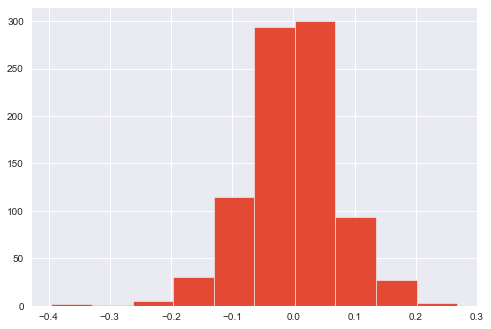

In [38]:
residuals3 = np.log(trainY) - mlr_ylog_tr.predict(trainX_trans)
plt.hist(residuals3)

### 4. MLR model with y variable log-transformed and features Yeo-Johnson transformed only:

In [39]:
# scaler_trainX = StandardScaler()
# scaler_testX = StandardScaler()

# scaler_trainX.fit(trainX)
# scaler_testX.fit(testX)

# trainX_scl = scaler_trainX.transform(trainX)
# testX_scl = scaler_testX.transform(testX)

# trfm = PowerTransformer(method='yeo-johnson')
# trainX_trans = trfm.fit_transform(trainX_scl)
# testX_trans = trfm.fit_transform(testX_scl)

# mlr_ylog_ptr = LinearRegression()
# model_results(trainX_trans, np.log(trainY), testX_trans, np.log(testY), mlr_ylog_ptr, show = True)

In [40]:
# residuals4 = np.log(trainY) - mlr_ylog_ptr.predict(trainX_trans)
# plt.hist(residuals4)

### 5. MLR model with y variable log-transformed and features box-cox transformed only:

In [41]:
# trfm = PowerTransformer(method='box-cox')
# trainX_trans = trfm.fit_transform(trainX)
# testX_trans = trfm.fit_transform(testX)

# mlr_ylog_ptr1 = LinearRegression()
# model_results(trainX_trans, trainY, testX_trans, testY, mlr_ylog_ptr1, show = True)

In [42]:
# residuals4 = np.log(trainY) - mlr_ylog_ptr1.predict(trainX_trans)
# plt.hist(residuals4)

### 6. Scaled model only

In [43]:
# scaler = StandardScaler()

# trainX = scaler.fit_transform(trainX)
# testX = scaler.transform(testX)

# mlr_scaled = LinearRegression()
# model_results(trainX, trainY, testX, testY, mlr_scaled, show = True)

## Picking MLR model with y variable log-transformed and features log transformed as the final model:

In [44]:
final_model = mlr_ylog_tr

### Trying to find the best alpha for Lasso feature selection

In [45]:
lasso  = Lasso()

# Creating parameter list to search for different alphas
paramDict = {'alpha': np.linspace(0.01,100,10)}

# Initiating the Grid Search
grid = GridSearchCV(lasso, paramDict, cv=5, return_train_score = True)

# Fitting the grid object
ans_mlr = grid.fit(trainX_trans, np.log(trainY))

In [46]:
## The best parameter is
ans_mlr.best_params_

{'alpha': 0.01}

In [47]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.01, random_state=42))
feature_sel_model.fit(trainX_trans, np.log(trainY))

SelectFromModel(estimator=Lasso(alpha=0.01, random_state=42))

In [48]:
# feature_sel_model.get_support()

In [49]:
selected_feat = trainX_trans.columns[(feature_sel_model.get_support())]
selected_feat

Index(['LotArea', 'LotShape', 'OverallQual', 'MasVnrArea', 'BsmtQual',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'KitchenQual',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF',
       'sold_age', 'yr_since_remod', 'Encl_Porch_tot', 'Usable_Space'],
      dtype='object')

In [50]:
model_results(trainX_trans[selected_feat], np.log(trainY), testX_trans[selected_feat], np.log(testY),\
              mlr_ylog_tr, show = True)

Train R^2 is equal to 0.901
Test R^2 is equal to 0.863
The intercept is 6.482
RSS is equal to 13.194
RMSE is equal to 0.123
The training error is: 0.09901
The test     error is: 0.13710


[0.09900516221701605, 0.1370973899958715]

- Running the model in statsmodels to check stats

In [51]:
# Loading packages that are needed

import statsmodels.api as sm

In [52]:
# Separating dependant and independant variables and adding constant column (all features)

x = trainX_trans
y = np.log(trainY)
x = sm.add_constant(x)

In [53]:
# Separating dependant and independant variables and adding constant column (all features)

x1 = trainX_trans[selected_feat]
y1 = np.log(trainY)
x1 = sm.add_constant(x1)

In [54]:
# Creating model and looking at summary

fin_mlr_model1 = sm.OLS(y, x).fit()
print(fin_mlr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     48.16
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          6.66e-285
Time:                        09:47:14   Log-Likelihood:                 1033.8
No. Observations:                 871   AIC:                            -1440.
Df Residuals:                     557   BIC:                             57.99
Df Model:                         313                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

In [55]:
# Creating model and looking at summary

fin_mlr_model2 = sm.OLS(y1, x1).fit()
print(fin_mlr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     407.6
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:47:15   Log-Likelihood:                 588.80
No. Observations:                 871   AIC:                            -1138.
Df Residuals:                     851   BIC:                            -1042.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4818      0.156     41.

In [56]:
# Overall f-statistic score is low (6.66e-285 and 0 respectively) which tells is that the model is statistically 
# significant

# Independence of residuals:
    #*Durbin-Watson test, is used to detect the presence of autocorrelation in the residuals of a regression.
    # For model1 Durbin-Watson score is 2.147 and for 2 is 2.007, is within the range of 1.5 and 2.5, we would consider 
    # autocorrelation not to be problematic for this regression model
    
# Jarque-Bera test: The Prob(JB) is low (both models) which says this data has skewness and kurtosis that is 
# significantly different from a normal distribution

## MLR EDA:

In [57]:
from statsmodels.stats.diagnostic import normal_ad

### Final model 1:

In [58]:
# Creating columns needed for assumption graphs:

trainX['house_sales_pred'] = fin_mlr_model1.predict(x)
trainX['actual_sales'] = np.log(trainY)
trainX['residual'] = fin_mlr_model1.resid

<Figure size 1440x1440 with 0 Axes>

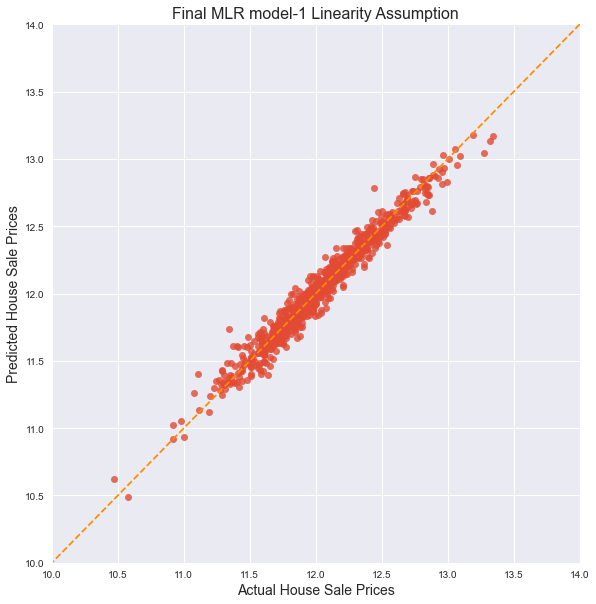

In [59]:
# Plotting the observed vs predicted values

plt.figure(figsize=(20, 20))
sns.lmplot(x='actual_sales', y='house_sales_pred', data=trainX, palette="Set2", fit_reg=False, size=8)
    
# Plotting the diagonal line

line_coords = np.arange(trainX[['actual_sales', 'house_sales_pred']].min().min()-2, 
                        trainX[['actual_sales', 'house_sales_pred']].max().max()+2)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

# Labeling and graph adjustment

plt.ylabel('Predicted House Sale Prices', fontsize=14)
plt.xlabel('Actual House Sale Prices', fontsize=14)
plt.title('Final MLR model-1 Linearity Assumption', fontsize=16)
plt.xlim(10, 14)
plt.ylim(10, 14)
plt.show()

In [60]:
# Performing the Anderson- Darling test on the residuals

p_value = normal_ad(trainX['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 1.8667955044754764e-08


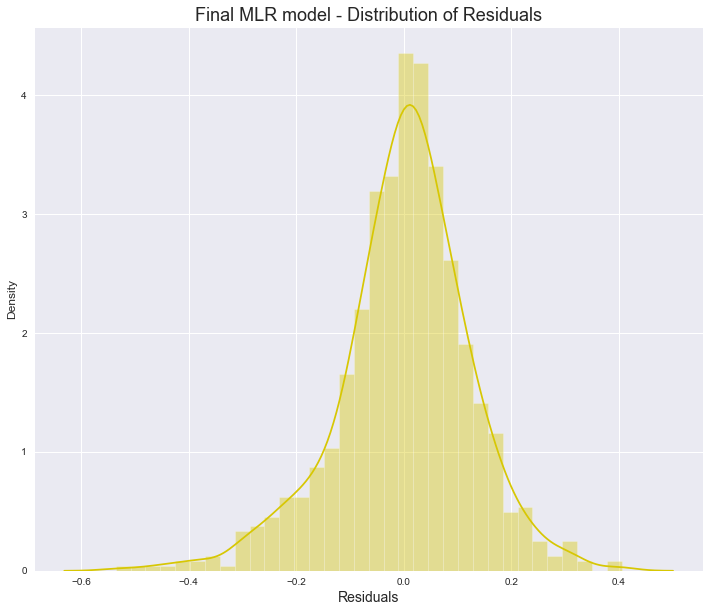

In [71]:
# Plotting distribution of errors

plt.subplots(figsize=(12, 10))
plt.title('Final MLR model - Distribution of Residuals', fontsize=18)
sns.distplot(trainX['residual'], color="y")
plt.xlabel('Residuals', fontsize=14)
plt.show()

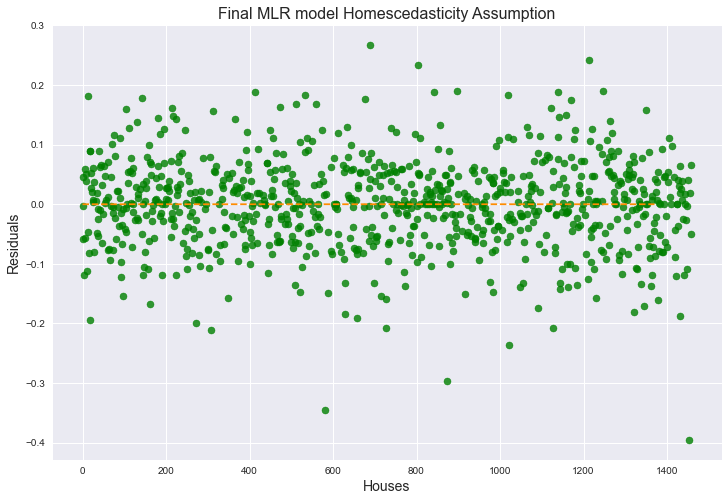

In [62]:
# Plotting the residuals

plt.subplots(figsize=(12, 8))
plt.scatter(x=trainX.index, y=trainX.residual, alpha=0.8, color='green')
plt.plot(np.repeat(0, len(trainX.index)+500), color='darkorange', linestyle='--')

plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Houses', fontsize=14)
plt.title('Final MLR model Homescedasticity Assumption', fontsize=16)
plt.show()

### Final model 2:

In [63]:
# Creating columns needed for assumption graphs:

trainX['house_sales_pred'] = fin_mlr_model2.predict(x1)
trainX['actual_sales'] = np.log(trainY)
trainX['residual'] = fin_mlr_model2.resid

<Figure size 1440x1440 with 0 Axes>

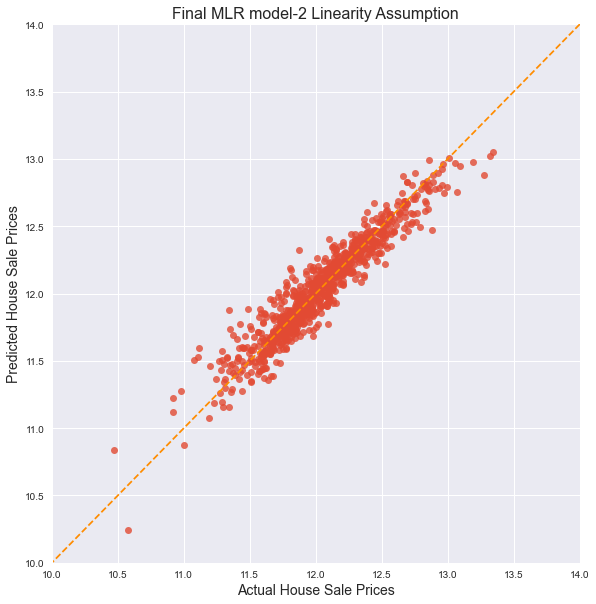

In [64]:
# Plotting the observed vs predicted values

plt.figure(figsize=(20, 20))
sns.lmplot(x='actual_sales', y='house_sales_pred', data=trainX, palette="Set2", fit_reg=False, size=8)
    
# Plotting the diagonal line

line_coords = np.arange(trainX[['actual_sales', 'house_sales_pred']].min().min()-2, 
                        trainX[['actual_sales', 'house_sales_pred']].max().max()+2)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

# Labeling and graph adjustment

plt.ylabel('Predicted House Sale Prices', fontsize=14)
plt.xlabel('Actual House Sale Prices', fontsize=14)
plt.title('Final MLR model-2 Linearity Assumption', fontsize=16)
plt.xlim(10, 14)
plt.ylim(10, 14)
plt.show()

In [65]:
# Performing the Anderson- Darling test on the residuals

p_value = normal_ad(trainX['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 9.682080160941544e-14


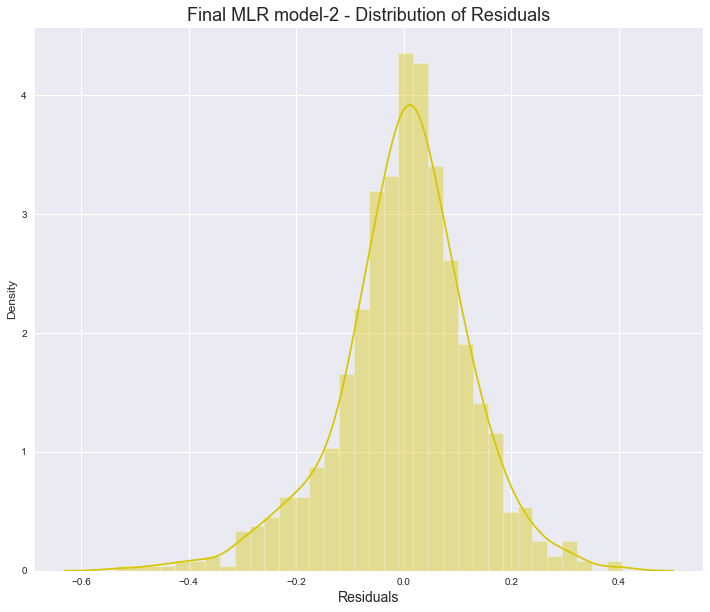

In [70]:
# Plotting distribution of errors

plt.subplots(figsize=(12, 10))
plt.title('Final MLR model-2 - Distribution of Residuals', fontsize=18)
sns.distplot(trainX['residual'], color="y")
plt.xlabel('Residuals', fontsize=14)
plt.show()

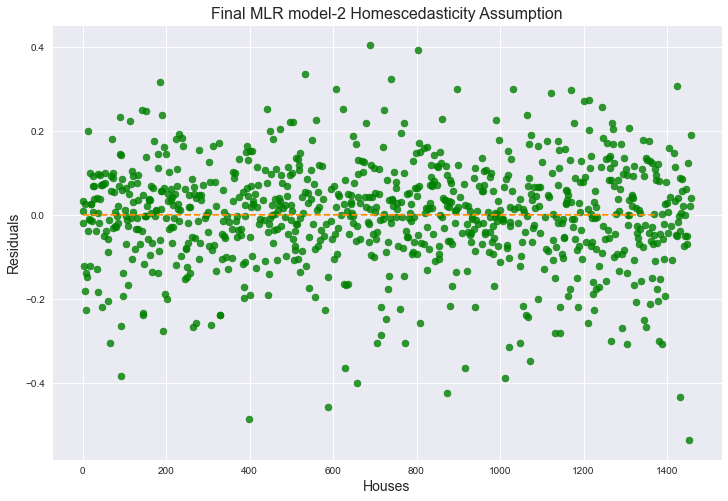

In [67]:
# Plotting the residuals

plt.subplots(figsize=(12, 8))
plt.scatter(x=trainX.index, y=trainX.residual, alpha=0.8, color='green')
plt.plot(np.repeat(0, len(trainX.index)+500), color='darkorange', linestyle='--')

plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Houses', fontsize=14)
plt.title('Final MLR model-2 Homescedasticity Assumption', fontsize=16)
plt.show()

- Complete residual plots for both models

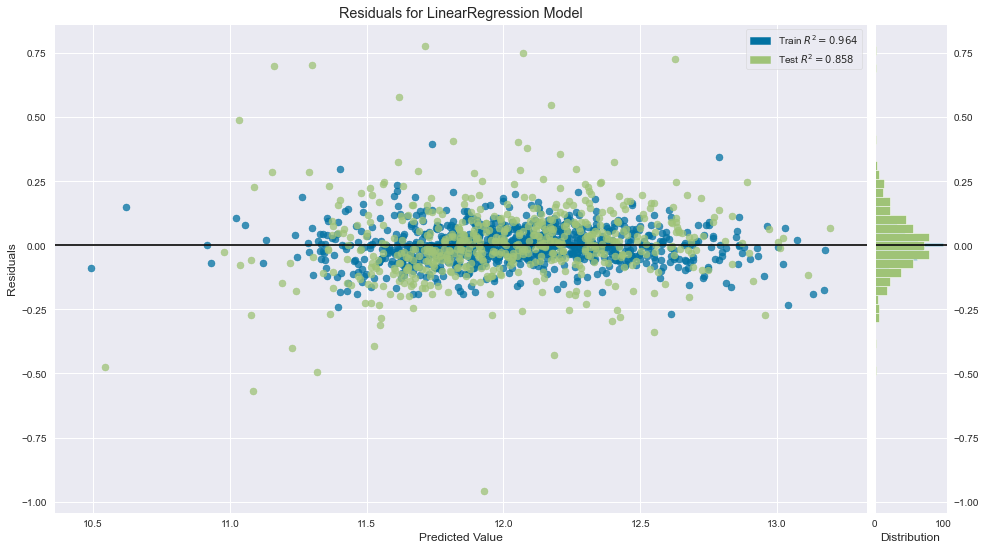

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
plt.figure(figsize = (16,9))
visualizer2 = ResidualsPlot(LinearRegression())
visualizer2.fit(trainX_trans, np.log(trainY))
visualizer2.score(testX_trans, np.log(testY))
visualizer2.poof()

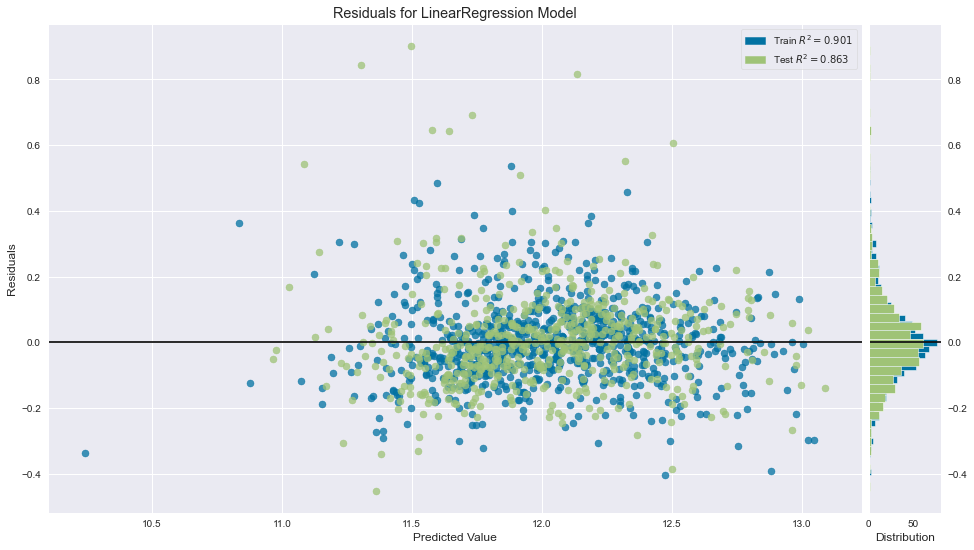

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [69]:
plt.figure(figsize = (16,9))
visualizer2 = ResidualsPlot(LinearRegression())
visualizer2.fit(trainX_trans[selected_feat], np.log(trainY))
visualizer2.score(testX_trans[selected_feat], np.log(testY))
visualizer2.poof()